# Altitudinal Climate Change Across the US

Nina Hayford & Sierra Mattiar (The University)

## Introduction

In this project, we are addressing how the temperature has changed in the US over the last two decades in relation to different altitudes. This is an important topic to cover because in the realm of climate change, higher altitude regions tend to respond to climate change in complex ways \[@Penn_LPS_Online_2024a\]. Being able to track these interesting changes will provide us with data to help people understand why these regions respond in certain ways. The data we have might also help us understand the highly impacted areas that might be suffering from the impacts of climate change more than other areas. Another reason why this topic is important to study is the fact that higher altitude areas are more sensitive to climate shifts \[@ITT_User_2023a\]. With the climate shiftinf rapidly, there is much research to be done to see how sensitive these areas are and in what aspect. Lastly, high altitudes contribute to climate variability and play a role in atmospheric circulation patterns \[@ITT_User_2023a\] so there could be much more effected by the altitudes than just the climate.

## Data Exploration

The data for this project was obtained from the NOAA website. The data includes:

-   **32_or_cooler.txt**: Number of days with minimum temperature ≤ 32°F

-   **90_or_higher.txt**: Number of days with maximum temperature ≥ 90°F

-   **highest_temp.txt**: Highest recorded temperature per month

-   **lowest.temp.txt**: Lowest recorded temperature per month

-   **humidity.txt**: Annual relative humidity by location

-   **nrmavg.txt, nrmmax.txt, and nrmmin.txt**: Normal average, maximum, and minimum daily temperatures

-   **elevation_US_Cities.csv**: elevation data with the peaks and dips of the major US cities

Each dataset includes location information (e.g., city or station), date/year, and the measurement of interest. These will be cross-referenced with elevation data to determine altitudinal patterns.

We focused on data components that show temperature change and compared their altitudes to see if different altitudes are affected by climate change differently. Specifically, we:

-   Analyzed the trend in 90°F+ and ≤32°F days from 2000 to 2020
-   Investigated elevation bins to compare temperature trends
-   Looked at changes in humidity levels at varying altitudes

### Statistical Tests

-   **Linear Regression**: Modeled changes in temperature-related metrics over time, using elevation as a predictor
-   **ANOVA**: Tested for significant differences in climate changes across different elevation bins

### Data cleaning

-   Standardize temperature units (°F across all data)
-   Remove rows with missing values or null values
-   Filter the time range to 2000-2020
-   Merge data by station ID and region
-   Create altitude bins (\<1000 ft, 1000-3000 ft, \>3000 ft)

### Data Visualization

#### Visualization 1

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

(`stat_summary()`).

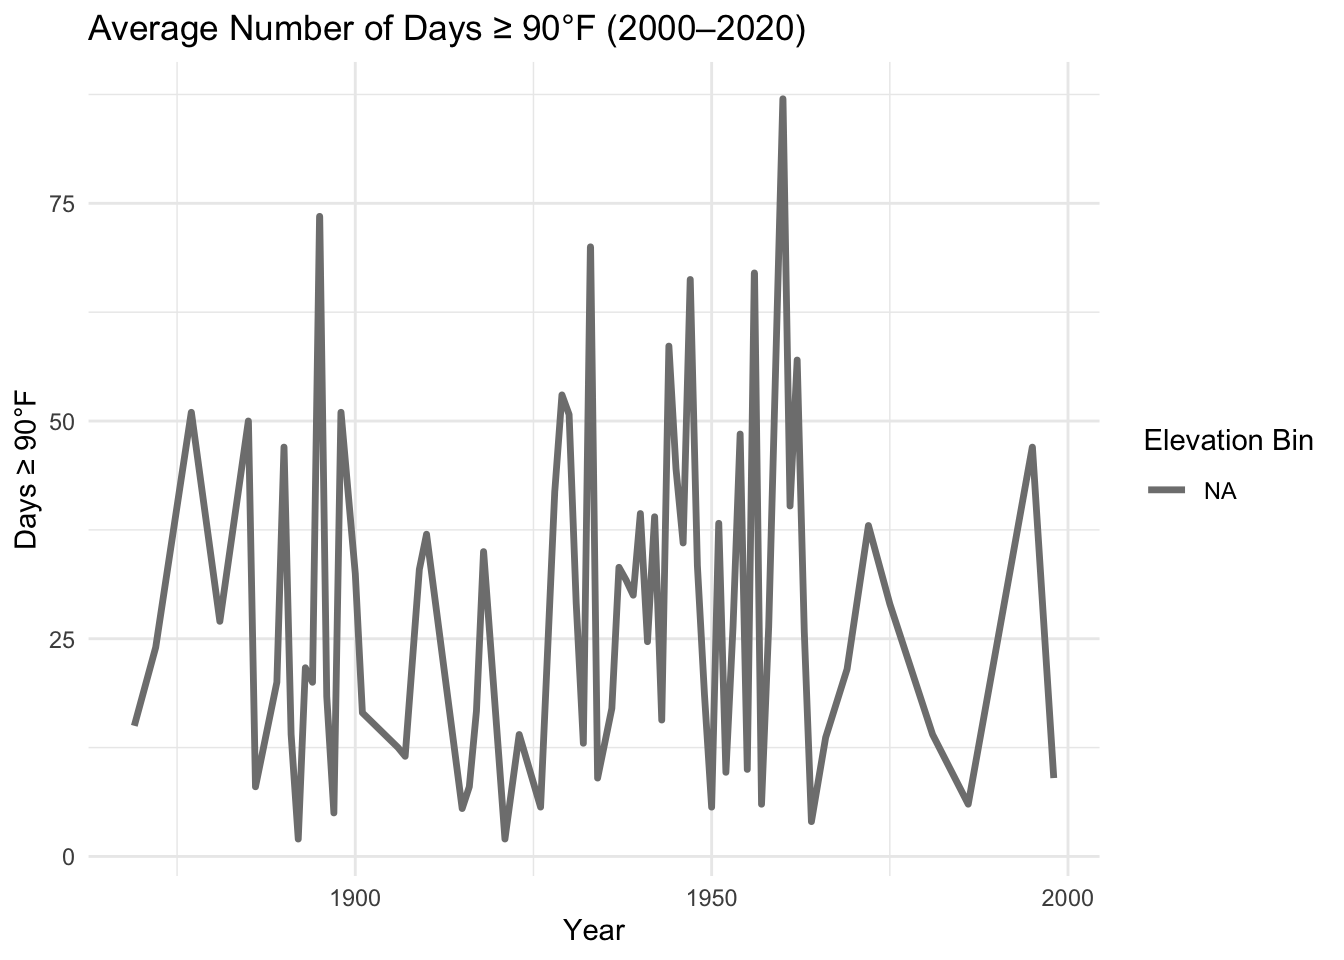

In [ ]:
# Add a Year column (based on End_Date or Start_Date if needed)
hot_days <- hot_days %>%
  mutate(Year = as.numeric(substr(as.character(Start_Date), 1, 4)))

# Plot trend over time by elevation bin
hot_days %>%
  ggplot(aes(x = Year, y = ANN, color = elevation_bin)) +
  stat_summary(fun = mean, geom = "line", linewidth = 1.2) +
  labs(title = "Average Number of Days ≥ 90°F (2000–2020)",
       x = "Year",
       y = "Days ≥ 90°F",
       color = "Elevation Bin") +
  theme_minimal()

#### Visualization 2

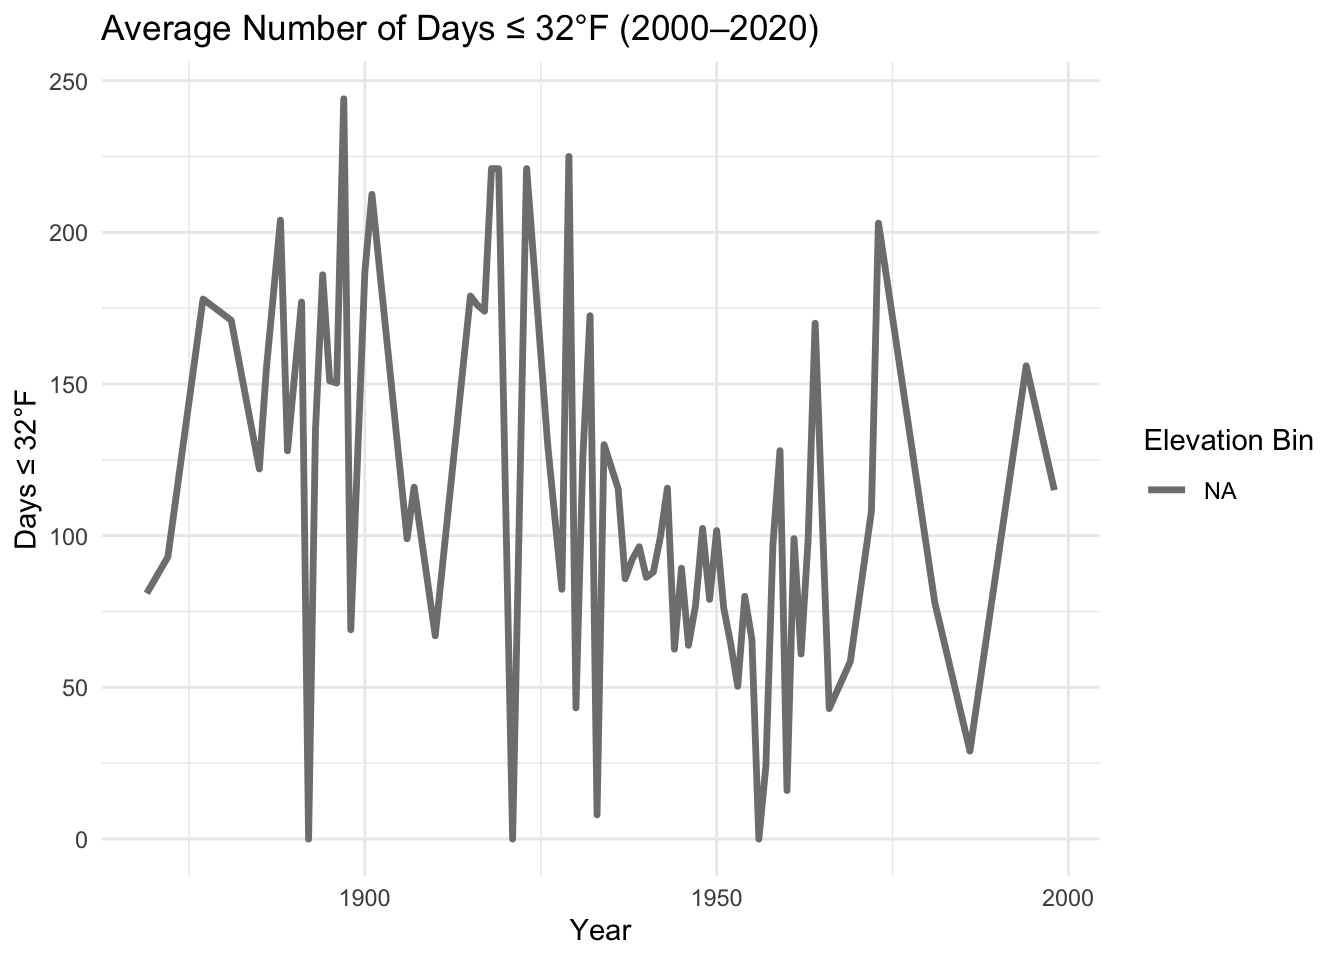

In [ ]:
library(stringr)
library(dplyr)
# Load and clean data
cool_days <- read_csv("cleaned_32_or_cooler.csv", show_col_types = FALSE)

elevation_data <- read_csv("elevation_US_Cities_cleaned.csv", show_col_types = FALSE)

# Create an elevation column 
elevation_data <- elevation_data %>%
  mutate(Elevation = as.numeric(`High Feet`)) %>%
  select(City, State, Elevation)

# Merge elevation data with hot_days
cool_days <- left_join(cool_days, elevation_data, by = c("City", "State"))

# Now create elevation bins
cool_days <- cool_days %>%
  mutate(elevation_bin = case_when(
    Elevation < 1000 ~ "Low (<1000ft)",
    Elevation >= 1000 & Elevation < 3000 ~ "Mid (1000–3000ft)",
    Elevation >= 3000 ~ "High (>3000ft)"
  ))

# Create a proper Year column (if it uses the YYYYMM format)
cool_days <- cool_days %>%
  mutate(Year = as.integer(substr(Start_Date, 1, 4)))

# Filter data to include only years 2000 to 2020
cool_days_filtered <- cool_days %>%
  dplyr::filter(Year >= 2000 & Year <= 2020)

# Plot the trend over time by elevation bin
cool_days %>%
  ggplot(aes(x = Year, y = ANN, color = elevation_bin)) +
  stat_summary(fun = mean, geom = "line", linewidth = 1.2) +
  labs(title = "Average Number of Days ≤ 32°F (2000–2020)",
       x = "Year",
       y = "Days ≤ 32°F",
       color = "Elevation Bin") +
  theme_minimal()

## Methods Identification

Within RStudio, we can perform spatial analysis to show regional variations in temperature. We can do this by using mapping tools like ggplot2, sf, or terra. We were also thinking about dividing the data by months and possibly seasonal as well. We will assess how temperature changes over time using line graphs or trend lines, then compare them to the region they are in. We could include more supplemental data like normal temperatures to compare what the temperatures usually look like versus what they are now. We could also include things like humidity because humidity changes a lot in different elevations so it might be something important to keep track of. Some potential challenges we might see in the data is missing values or unavailable pieces of data. It also might have regional variation where not all areas have elevation data so we will not be able to use it. Some potential challenges we see in the methods include the complexity to compare data over two decades across an entire country. So it is very important to focus on organizing and cleaning the data. It also may be hard to strictly distinguish between correlation and causation. Lastly, the selected methods will help us get to our final goal because these methods help us perform spatial and temporal analysis to visualize the data and support our claim. We can also compare our findings to try and find a possible cause or a strong influence for temperature changes.